In [ ]:
#Light Reading
#https://www.sjsu.edu/people/burford.furman/docs/me120/FFT_tutorial_NI.pdf
#https://kluedo.ub.uni-kl.de/frontdoor/deliver/index/docId/4293/file/exact_fft_measurements.pdf

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal
from scipy.fft import fft, fftfreq, fftshift

df = pd.read_csv('Waveform Capture.csv.gz')
n = len(df)
voltageData = df['CHANnel1 Data'].to_numpy()

In [3]:
voltageDataHann = voltageData * signal.windows.hann(n)
twosidedFFT = (1/n) * abs(fft(voltageDataHann))
onesidedFFT  = 2 * twosidedFFT
powerFFT = onesidedFFT ** 2
powerFFTdBm = 10 * np.log10(10 * powerFFT)
fftFreq = fftfreq(n, (df['Timestamp'].max() - df['Timestamp'].min()) / n)

In [4]:
freqFrame = pd.DataFrame(fftFreq, columns = ['Frequency (Hz)'])
dbmFrame = pd.DataFrame(powerFFTdBm, columns = ['Power (dBm)'])
fftFrame = freqFrame.join(dbmFrame)
fftFrame = fftFrame.loc[fftFrame['Frequency (Hz)'] > 0]
fftFrame['Frequency (MHz)'] = fftFrame['Frequency (Hz)'] / 1E6

,Frequency (Hz),Power (dBm),Frequency (MHz)
19999,9.999744e+06,-5.685214,9.999744
20000,1.000024e+07,-2.276170,10.000244


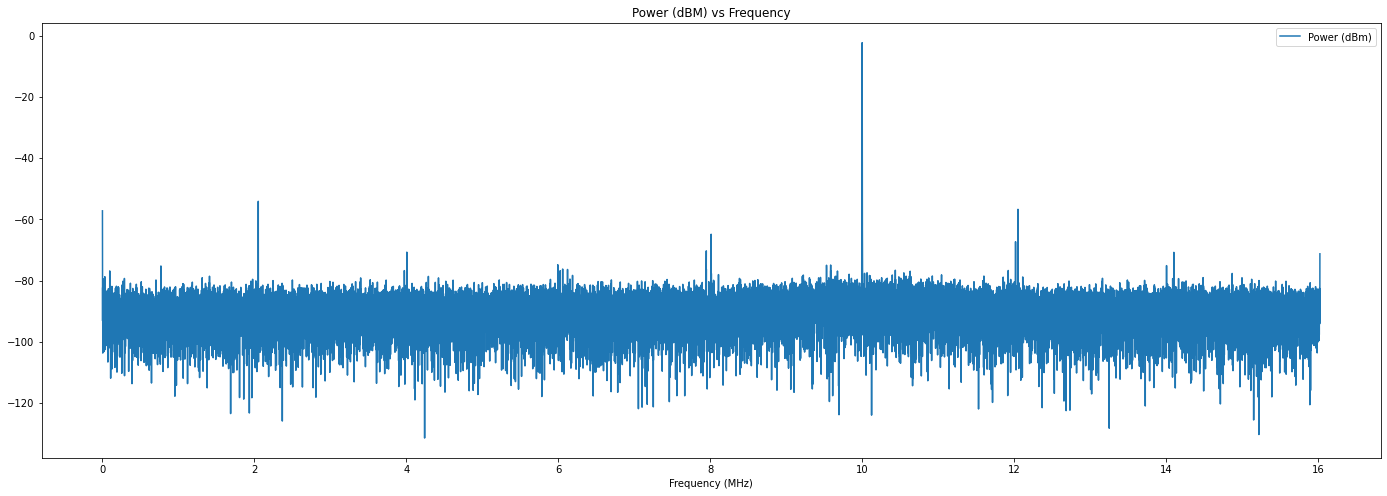

In [5]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
fftFrame.plot(x = 'Frequency (MHz)', y = 'Power (dBm)', title = 'Power (dBM) vs Frequency', figsize = (24,8));  #Semicolon hides prints
fftFrame.loc[fftFrame['Power (dBm)'] > -10]

In [6]:
print(voltageData.max())
print(voltageData.min())
print

0.50476993536
-0.50476993536


<function print>